In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None) 

In [52]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## EDA

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No     5163
Yes    1869
Name: Churn, dtype: int64


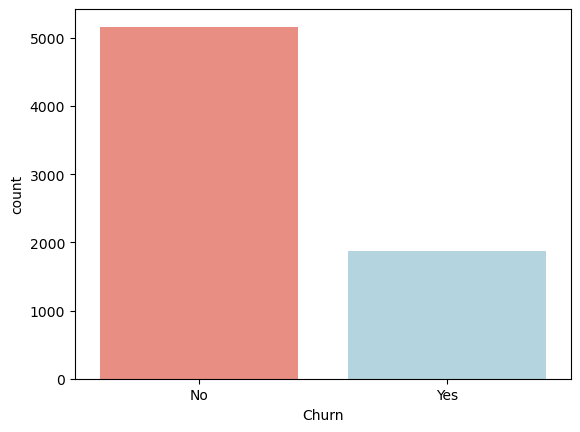

In [6]:
# Displaying a count plot for class balance
print(df.Churn.value_counts())
sns.countplot(x="Churn", data=df, palette=["salmon", "lightblue"]);

From the above graph, we can conclude that the two `Churn` classes are highly imbalanced.
* `73.42 %` instances belong to Class "No"
* `26.58 %` instances belong to Class "Yes"

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

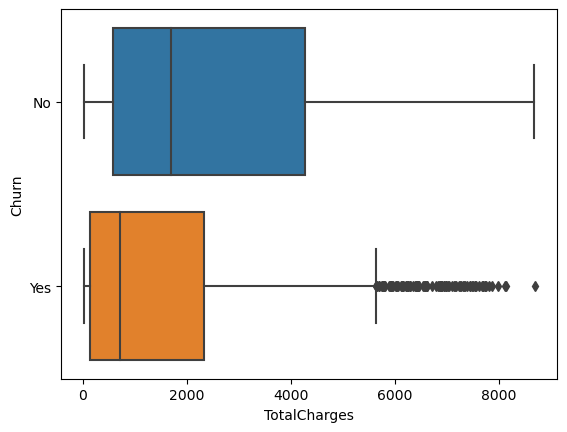

In [8]:
sns.boxplot(x="TotalCharges", y = "Churn" ,data=df);

For Churn Class `Yes`, it is observed that there are a lot of outliers.

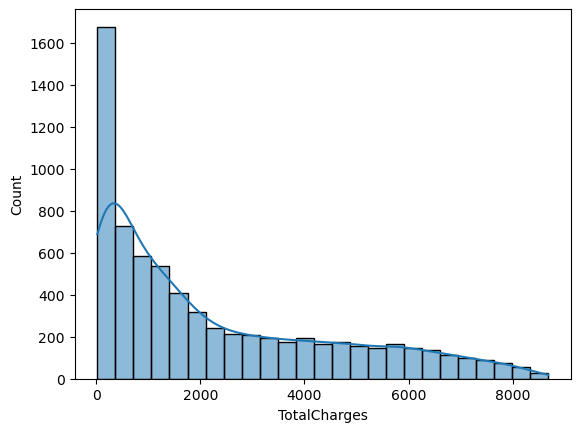

In [9]:
sns.histplot(x="TotalCharges",data=df, kde=True);

`TotalCharges` is rightly skewed, following a pareto distribution, that is, `20 %` of the total charges have a higher count as compared to `80 %` of the total charges. 

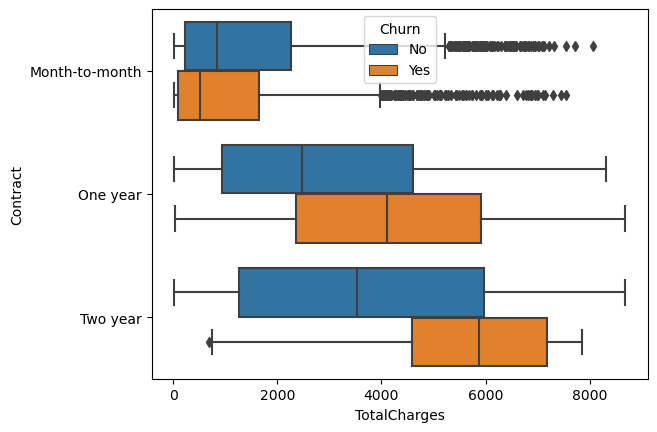

In [10]:
sns.boxplot(x="TotalCharges", y="Contract", data=df,
           hue="Churn");

1. `Month-to-Month` Contracts are positively skewed, and there is a presence of huge number of outliers which could prove to be sensitive the performance of a ML model. 
2. `One year` Contracts, for **Yes** Churn class, the distribution appears to be normal whereas for **No** Churn class, the distribution appears to be positively skewed. 
2. `Two year` Contracts are normally distributed, and there seems to be outliers for **Yes** Churn class. 

In [11]:
## Checking for categorical features in the data
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [12]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 
                             'Dependents','PhoneService', 'MultipleLines', 
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'InternetService',
                       'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 
                        'PaymentMethod', "Churn"]]).corr()
        
corr_df["Churn_Yes"].sort_values()[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [13]:
corr_df["Churn_Yes"].sort_values().iloc[1:-1].values

array([-0.30155234, -0.22757762, -0.22757762, -0.22757762, -0.22757762,
       -0.22757762, -0.22757762, -0.22757762, -0.19145432, -0.17822502,
       -0.17126992, -0.16471591, -0.16312844, -0.14998193, -0.13468684,
       -0.12414143, -0.118136  , -0.09077285, -0.08230697, -0.06619252,
       -0.0326536 , -0.0116914 , -0.0116914 , -0.00854464,  0.00854464,
        0.0116914 ,  0.04003274,  0.06085994,  0.06325398,  0.12843503,
        0.1309203 ,  0.14998193,  0.15054105,  0.16312844,  0.19145432,
        0.25205563,  0.26759512,  0.30145464,  0.30746259,  0.3368771 ,
        0.3422352 ,  0.40456455])

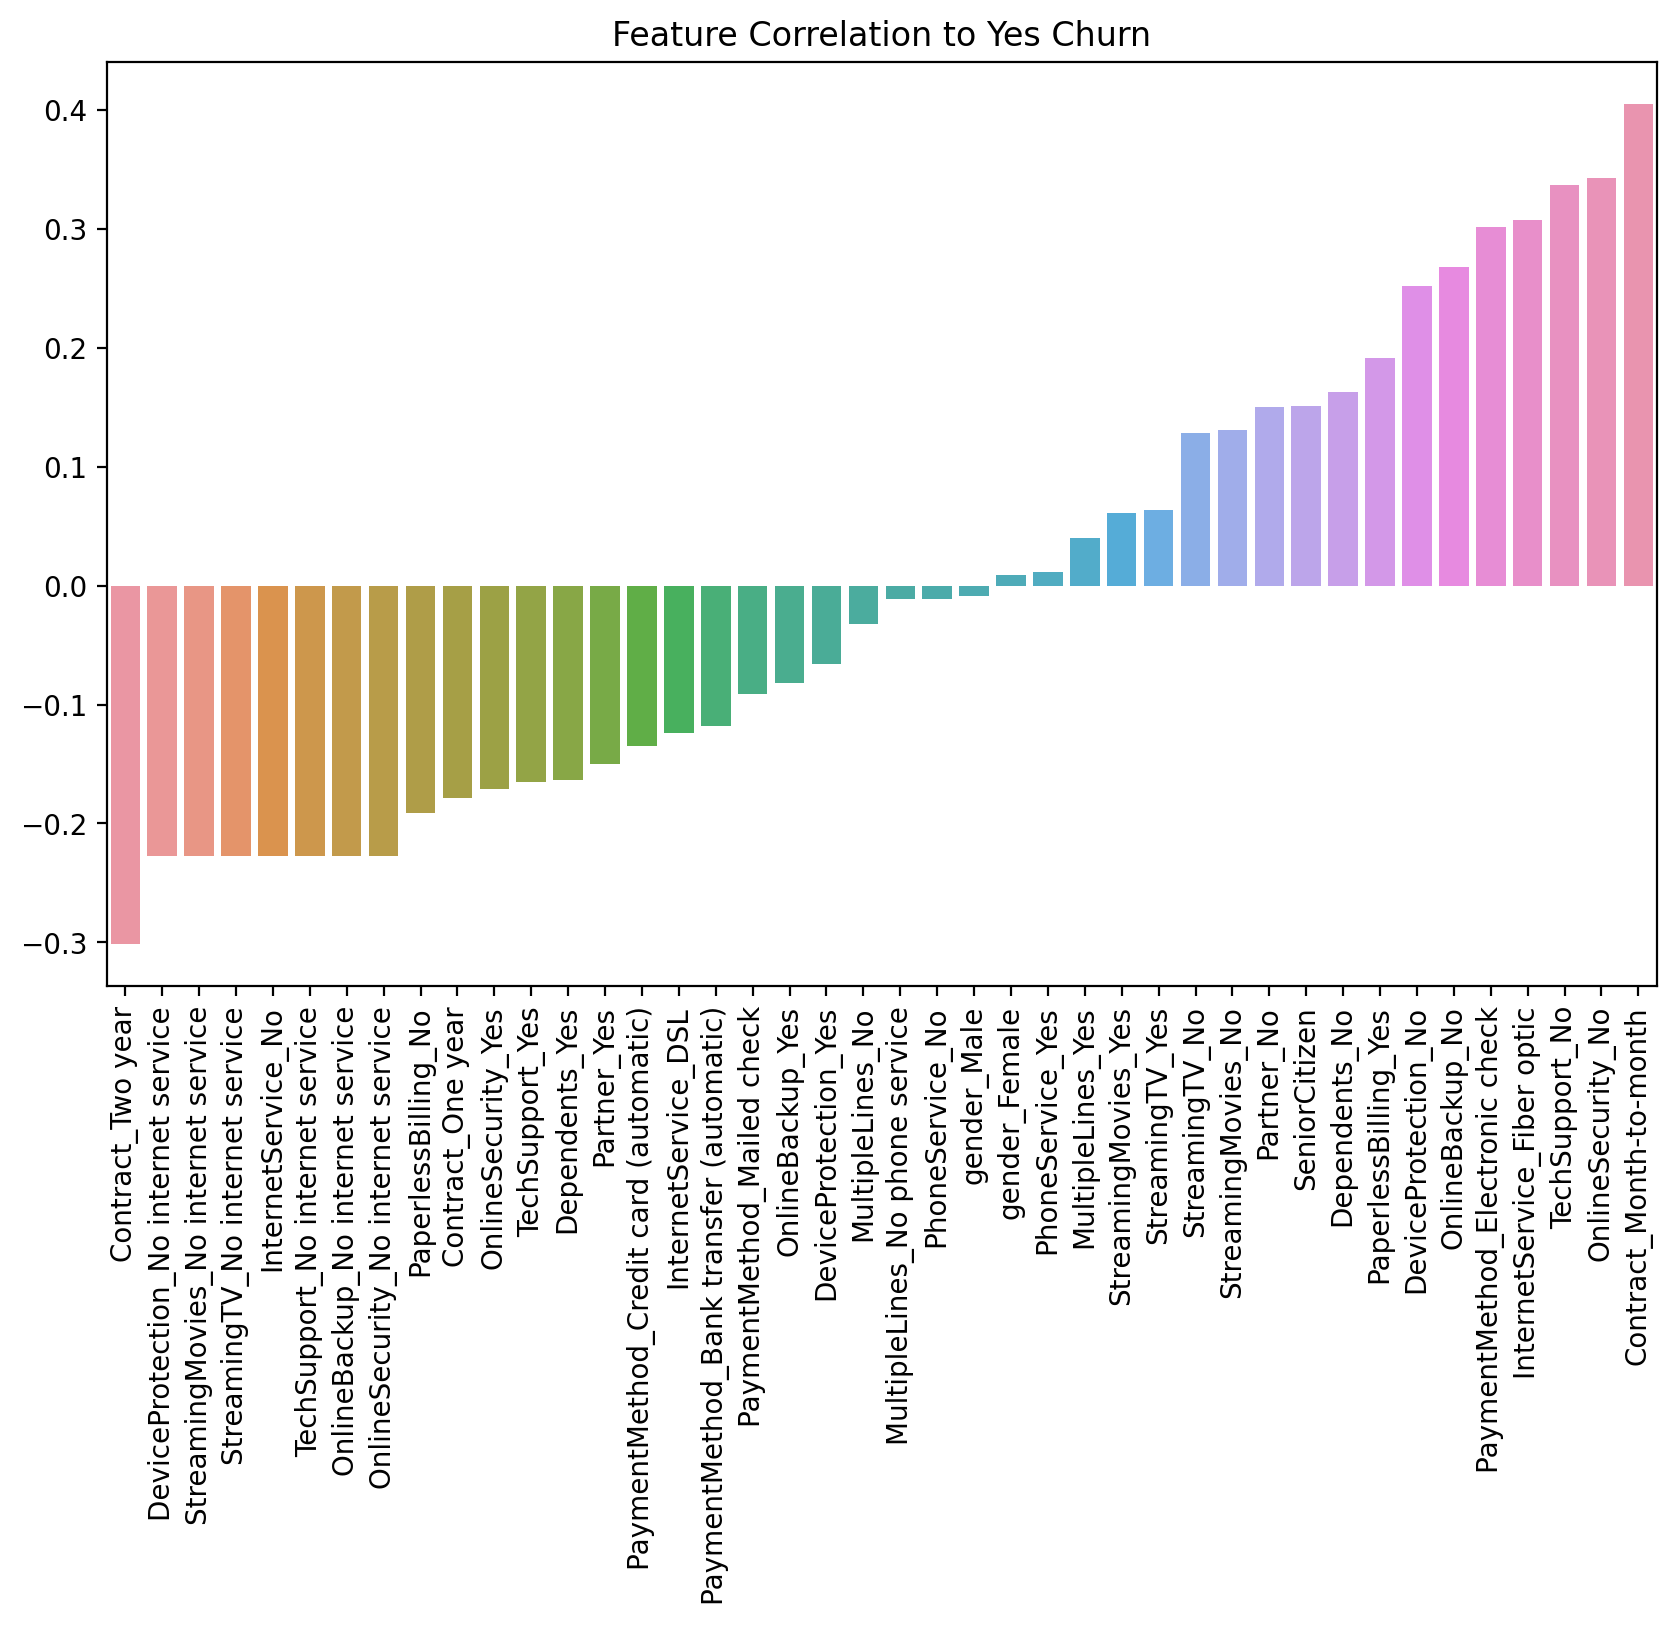

In [14]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(x=corr_df["Churn_Yes"].sort_values().iloc[1:-1].index,
           y=corr_df["Churn_Yes"].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

In [15]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [16]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

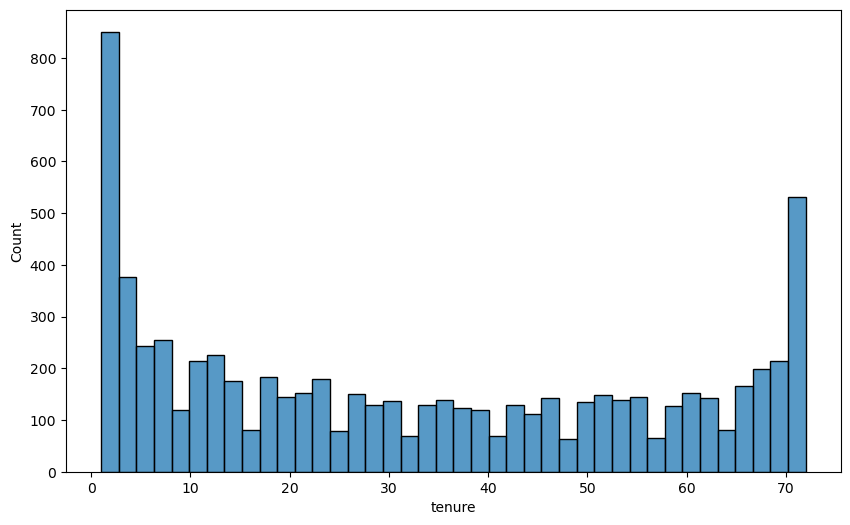

In [17]:
plt.figure(figsize=(10,6), dpi=100)
sns.histplot(x="tenure", data=df, bins=40);

<Figure size 700x700 with 0 Axes>

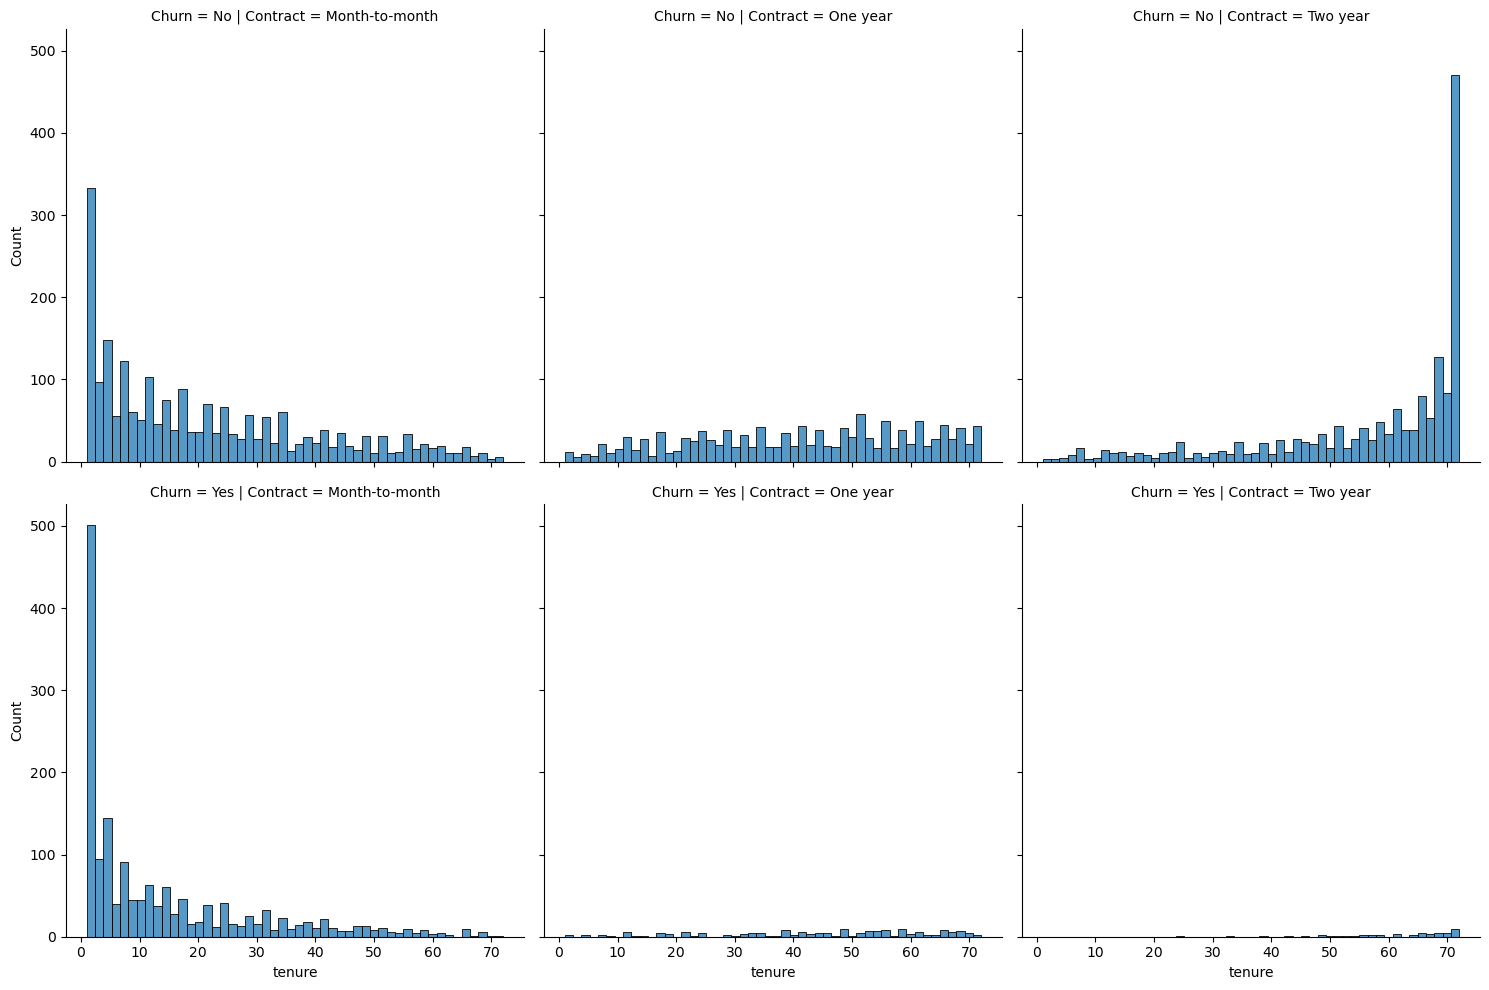

In [18]:
plt.figure(figsize=(7, 7), dpi=100)

sns.displot(x="tenure", data=df,bins=50, row="Churn", col="Contract");

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

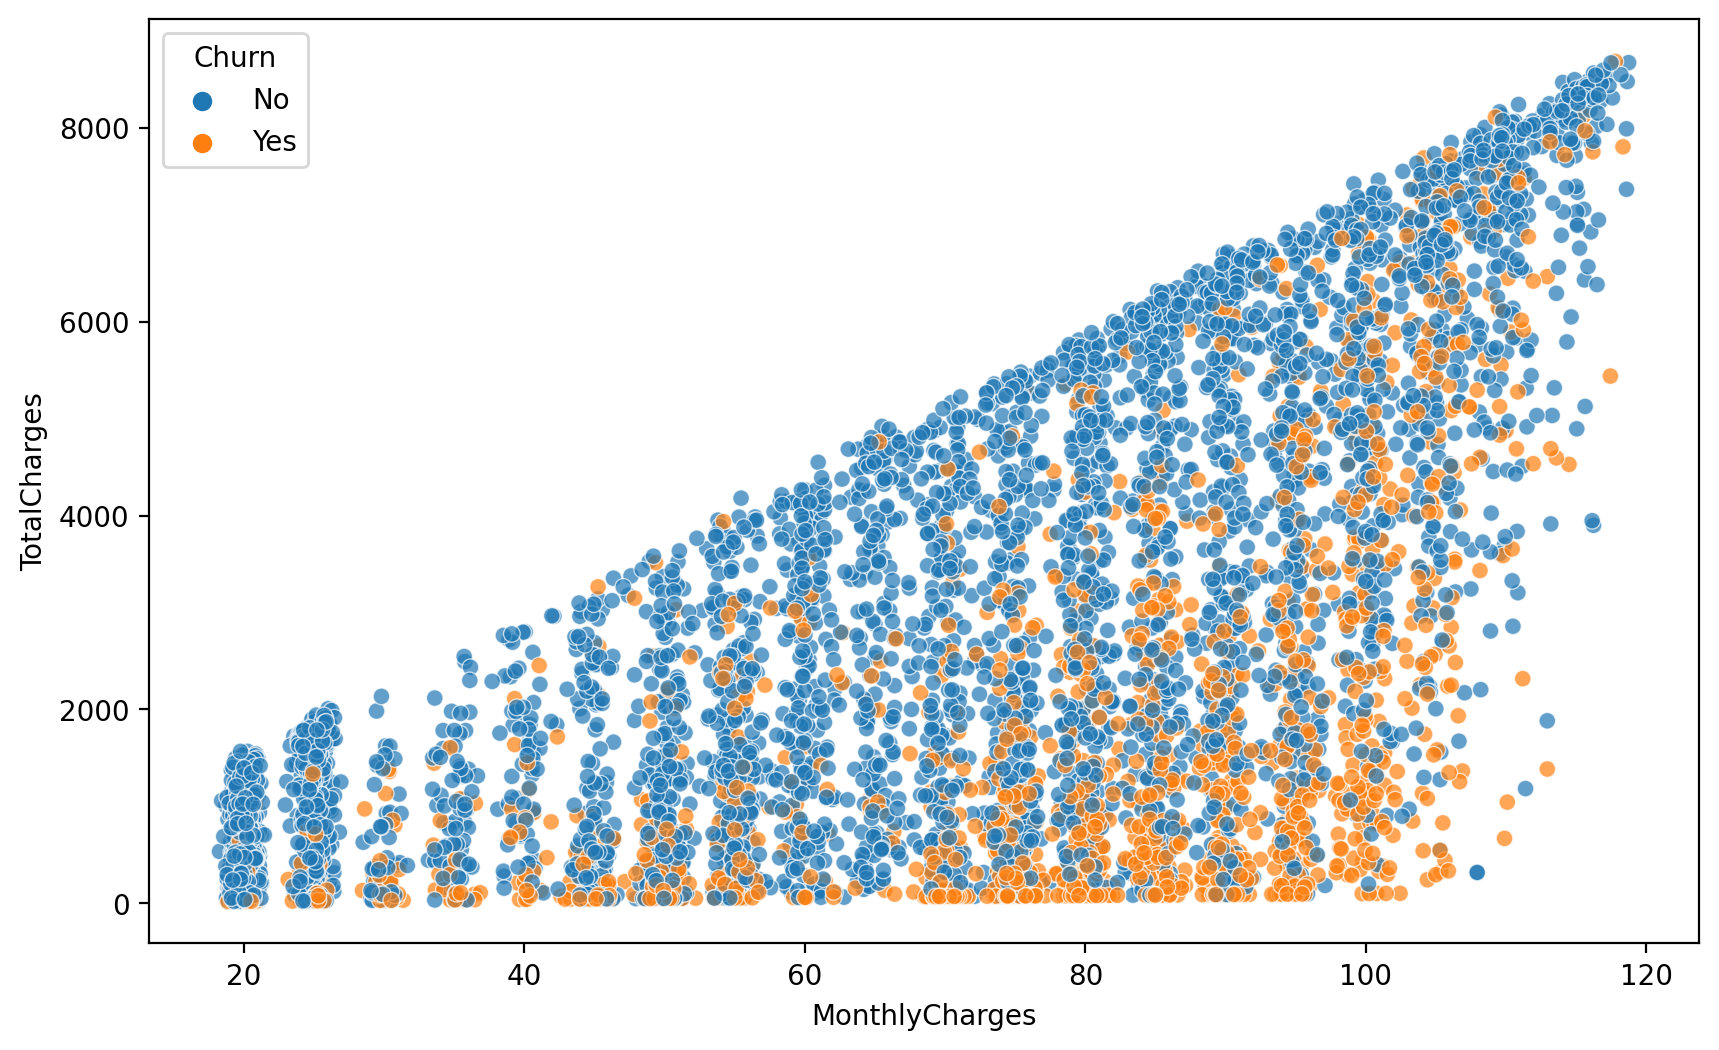

In [19]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',
                hue='Churn', alpha=0.7)

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
no_churn=df.groupby(["Churn", "tenure"]).count().transpose()["No"]
yes_churn=df.groupby(["Churn", "tenure"]).count().transpose()["Yes"]

In [22]:
churn_rate = 100*yes_churn/(no_churn+yes_churn)
churn_rate.transpose()["customerID"]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Text(0, 0.5, 'Churn %')

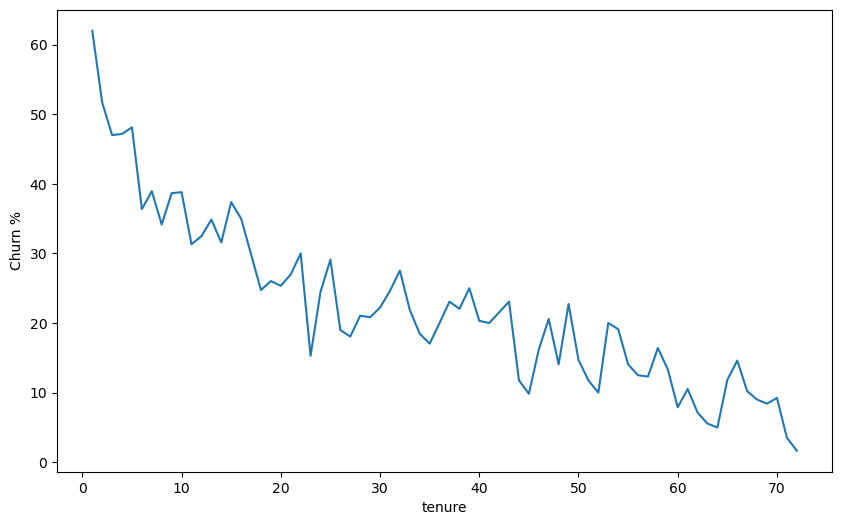

In [23]:
plt.figure(figsize=(10,6))
churn_rate.iloc[0].plot()
plt.ylabel("Churn %")

In [24]:
def tenure_cohort(tenure):
    if tenure<12:
        return "0-12 Months"
    
    elif 12<=tenure<24:
        return "12-24 Months"
    
    elif 24<=tenure<48:
        return "24-48 Months"
    
    else:
        return "Over 48 Months"

In [25]:
df["Tenure_Cohort"]=df["tenure"].apply(tenure_cohort)
df.head()[["tenure", "Tenure_Cohort"]]

,tenure,Tenure_Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

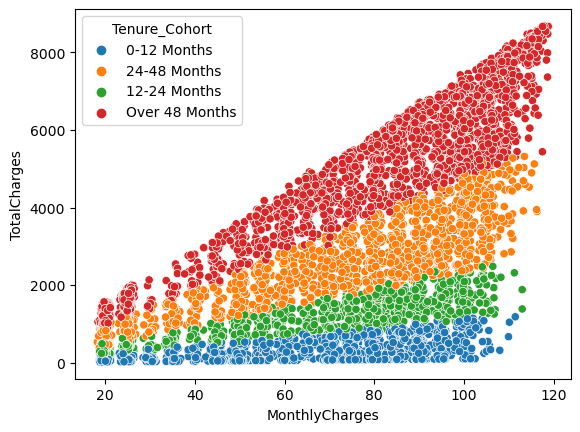

In [26]:
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=df,
               hue="Tenure_Cohort")

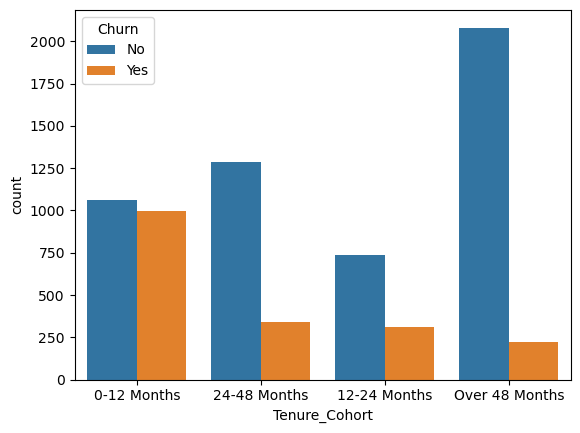

In [27]:
sns.countplot(x="Tenure_Cohort", hue="Churn", data=df);

<Figure size 640x480 with 0 Axes>

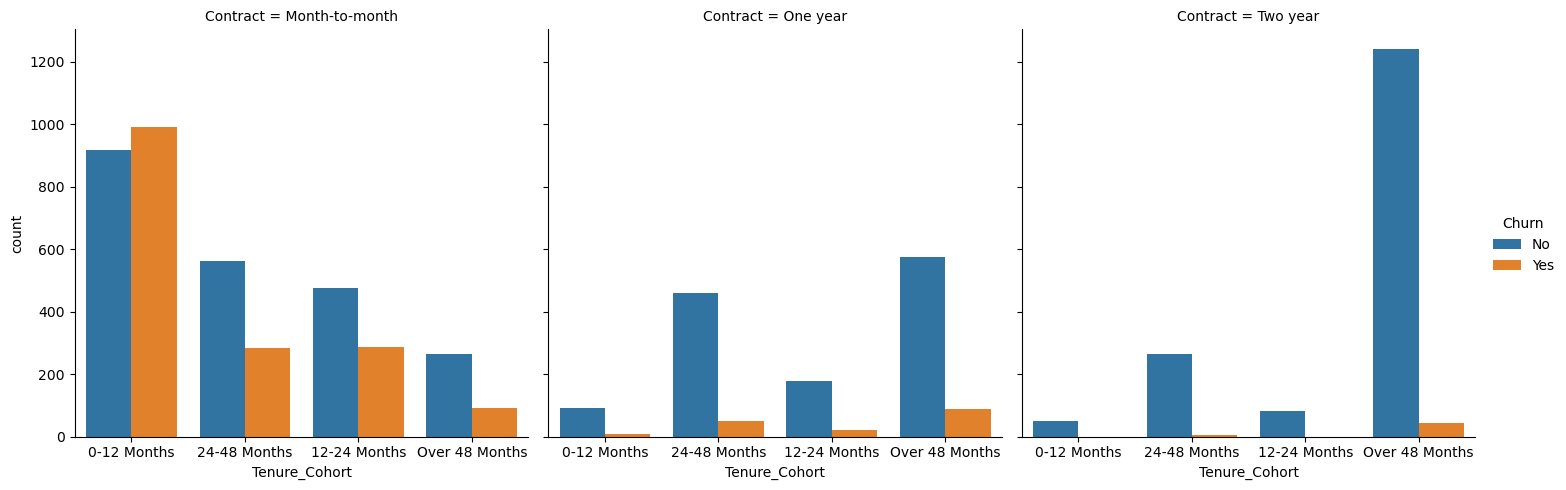

In [28]:
plt.figure(dpi=100)
sns.catplot(x="Tenure_Cohort", hue="Churn", data=df,
             col="Contract", kind="count");